In [173]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 

from pandas import pivot_table,DataFrame,crosstab

In [180]:
def DrawPie(df, xtitle='', ytitle="", pagetitle="", Xseries=[],Yseries='name of pie slice column',exlevels=(0,.1,0),labels='x values', colors=[],  pie_startangle=0,  comment="",  filename="", textsize = 20,  figsize=(10,10)):        
    """   
    ### Before calling this for a pie chart,
    ### prepare your data frame, all this does is draw the chart\n       
    #### OBJECTIVE:This Routine Draws Simple Pie Charts\n    
    ##### df = Data frame\n
    * <B>xtitle</B>  = Text on xaxis, not used\n
    * ytitle = Text on yaxis, not used\n
    * pagetitle = Text at top of page\n
    * Xseries = For plots that use an xseries\n
    * Yseries = columns of df to section in pie plot\n
    * explode = tuple with same number of elements as pie slices\n
    * Labels = List of labels to label each pie section with\n
    * Colors = List of colors to label each Pie section with\n
    * Pie_startangle = 0° is our 90°, -angles are clockwise from that,+angles are counter clockwise\n
    * (You may want to use this so that you can\n rotate an exploded section away from a title)*\n
    * comment = Some comment to the right\n
    * textsize = Size of text in Title\n
    * filename = simple name to call the file, an extension will be automatically added\n
    * figsize = Tuple of figure (**width, height**) in inches\n
    * ___________________________________________________________________________
    """
 
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111) 
    plt.rcParams['font.size'] = 18.0
    explode = exlevels
    labels=labels
    colors=colors     
    ax=plt.pie(df[Yseries], explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=pie_startangle)
    plt.tightlayout=True
    plt.text(.15,0,s=comment,rotation=0, weight='normal', bbox=dict(edgecolor='blue', facecolor='lightyellow', pad=3, linewidth=1),ha='left', va='top', wrap=True)  
    # ## Creates the pie chart based upon the values above
    # # Automatically finds the percentages of each part of the pie chart
    plt.title(pagetitle,size=textsize,color='blue')
    #plt.axis("equal") # Tells matplotlib that we want a pie chart with equal axes
    plt.axis([0,1,0,1])
    #if a file name is specifed then save it
    if filename != "":
         plt.savefig(filename)
    
    plt.show
# def DrawPlot(df,engine='mat',kind='bar',xtitle='X',ytitle="Y",pagetitle="Title",x,y,comment="",figsize=(10,10)):
#         if engine=="mat":    
#             if kind=='scatter':
#                 elif: kind=='bar':
#                 elif: kind=='barh':
#                 elif: kind=='pie':
#                 elif: kind=="line":
#         elif engine=='pan':
#             if kind=='scatter':
#             elif: kind=='bar':
#             elif: kind=='barh':
#             elif: kind=='pie':
#             elif: kind=="line":
#         elif engine=='plotly'
#         elif engine=='cross'

#def DFCleaner(df,expectations,action)
    #action -all'zero and keep
    
    
    

In [181]:
plt.style.use('seaborn-whitegrid')
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"
# Read the City and Ride Data
df_citydata = pd.read_csv(city_data_to_load)
df_ridedata = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df1=pd.merge(df_ridedata,df_citydata,on = ('city','city') )
df1['color']=df1['type'].map({"Suburban":"b","Urban":'r',"Rural":'g'}) # Map color columns based on type
dfc = df1[['city','color','type']] #double bracket is a dataframe

# Display the data table for preview
#
#dfc

In [182]:
df_buble1 = pd.pivot_table(df1,index=['city'],values=['fare','driver_count','color'],aggfunc=({'fare':[np.sum,np.mean,len],'driver_count':np.mean}))
df_buble1.columns =["_".join(x) for x in df_buble1.columns.ravel()] #renames intelligently
df_buble1.rename(columns={'driver_count_mean':'Drivers','fare_len':'Sales','fare_sum':'Total Sales','fare_mean':'Average Sale'},inplace=True) 
df_out = pd.merge(df_buble1,dfc,  on = 'city')
df_out.head(2)

,city,Drivers,Sales,Average Sale,Total Sales,color,type
0,Amandaburgh,12,18.0,24.641667,443.55,r,Urban
1,Amandaburgh,12,18.0,24.641667,443.55,r,Urban


## Bubble Plot of Ride Sharing Data

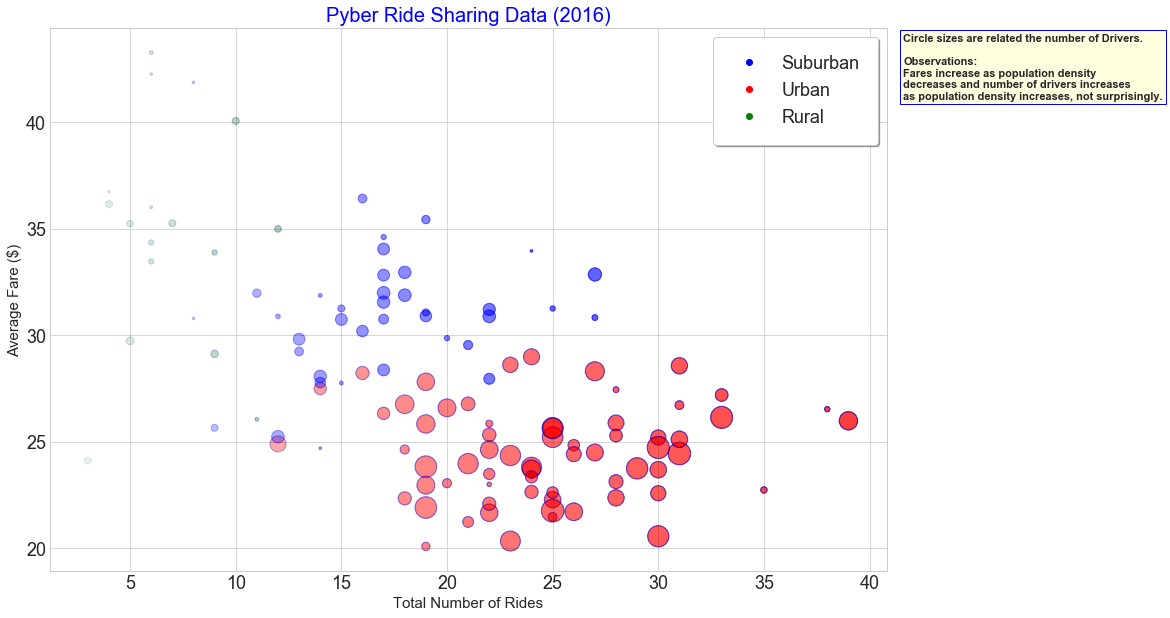

<Figure size 432x288 with 0 Axes>

In [183]:
# Obtain the x and y coordinates for each of the three city types
 
df=df_out 

 

 


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)  
# print out the message 1.02 widths from the lower left, with the top .99 heights
# use \n to make returns so I can have multiple lines.
ax.text(1.02,.99, "Circle sizes are related the number of Drivers.\n\nObservations:\nFares increase as population density\ndecreases and number of drivers increases\nas population density increases, not surprisingly.",
rotation=0, size=11, weight='bold',
bbox=dict(edgecolor='blue', facecolor='lightyellow', pad=3, linewidth=1),
ha='left', va='top', transform=ax.transAxes)
#This method for most bubble plots where the legend data is referring to some other dimension
#than the line color.  Use a dictionary to define the word,color combination
Legdict={"Suburban":"b","Urban":'r',"Rural":'g'}
# The following two lines generate custom fake lines that will be used as legend entries:
# A comprehension to create the lines that do not make lines, just a point at 0,0, with the defined color, marker style and line sytle for all values of the dictionary
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in Legdict.values()]
#now, plot it up and make it purty
ax.legend(markers, Legdict.keys(), numpoints=1,fancybox=True,loc='upper right',frameon=True,shadow=True,ncol=1,borderpad =1)

#Does the scatter plot

ax.scatter(x=df['Sales'],y=df['Average Sale'],s = df['Drivers']*7,c = df['color'],alpha = 0.03,edgecolors='b',cmap='spectral') 

plt.title('Pyber Ride Sharing Data (2016)',size=20,color='blue')
plt.ylabel('Average Fare ($)',size=15)
plt.xlabel("Total Number of Rides",size= 15)   
plt.show()
#dir(plt)
plt.savefig("PyberRideSharing")
 

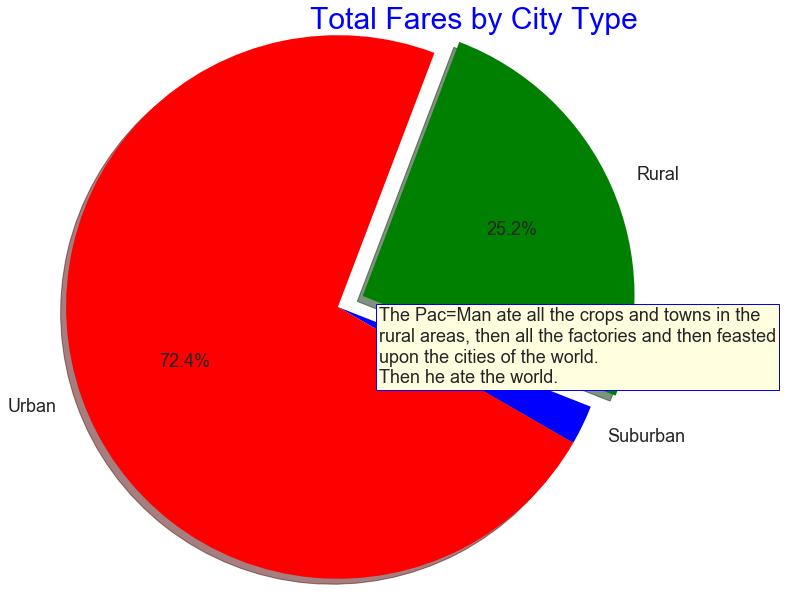

In [184]:
dfctp = pd.pivot_table(df_out,index=['type'],values=['Drivers','Sales','Total Sales'],aggfunc=({'Sales':np.sum,'Total Sales':np.sum,'Drivers':np.sum}))
dfctp.columns = ["".join(x) for x in dfctp.columns.ravel()] #renames intelligently
# print(dfctp) 
DrawPie(df = dfctp,
        pagetitle ='Total Fares by City Type',
        labels = ["Suburban","Rural","Urban"],
        colors = ["b","g","r"],
        Yseries = 'Total Sales',
        exlevels = (0,.1, 0),
        pie_startangle = -30,
        textsize = 30,
        comment = "The Pac=Man ate all the crops and towns in the\n rural areas, then all the factories and then feasted\n upon the cities of the world. \nThen he ate the world.",
        filename = 'TotalFaresbyCity')

In [185]:
# Show plot
#plt.show()
#df

## Total Fares by City Type

          Drivers    Sales  Total Sales
type                                   
Rural         537    975.0     33509.22
Suburban     8570  11505.0    358386.35
Urban       59602  41911.0   1030453.48


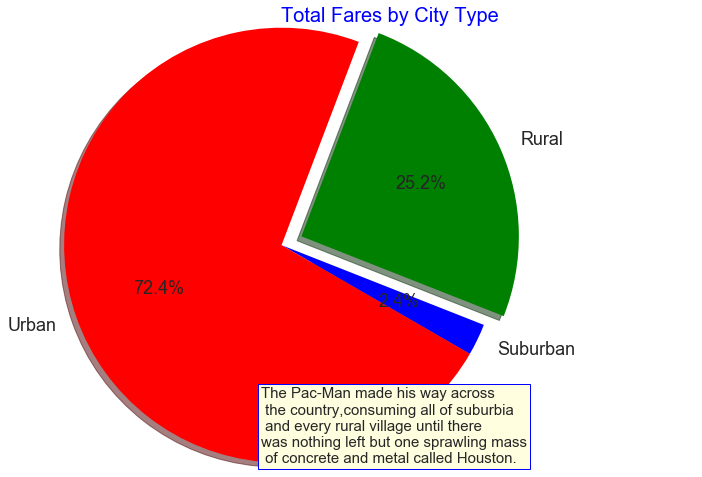

In [186]:
# Calculate Type Percents
# Tells matplotlib to seperate the "Python" section from the others
explode = (0,.1, 0        )
dfctp = pd.pivot_table(df_out,index=['type'],values=['Drivers','Sales','Total Sales'],aggfunc=({'Sales':np.sum,'Total Sales':np.sum,'Drivers':np.sum}))
dfctp.columns =["".join(x) for x in dfctp.columns.ravel()] #renames intelligently
print(dfctp) 
                                                                                               
# Build Pie Chart
labels=["Suburban","Rural","Urban"]
colors=["b","g","r"] 
AX=plt.pie(dfctp['Total Sales'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-30)
plt.tightlayout=True

plt.text(.15,0, "The Pac-Man made his way across\n the country,consuming all of suburbia\n and every rural village until there \nwas nothing left but one sprawling mass\n of concrete and metal called Houston. ",
rotation=0, size=15, weight='normal',
bbox=dict(edgecolor='blue', facecolor='lightyellow', pad=3, linewidth=1),
ha='left', va='top', transform=ax.transAxes)        
 
# ## Creates the pie chart based upon the values above
# # Automatically finds the percentages of each part of the pie chart
# #
 

plt.title('Total Fares by City Type',size=20,color='blue')


#plt.axis("equal") # Tells matplotlib that we want a pie chart with equal axes
plt.axis([0,1,0,1])
# #dir(plt)
plt.savefig("TotalFaresbyCity")
# Save Figure


In [187]:
# Show Figure
plt.show()

## Total Rides by City Type

          Drivers    Sales  Total Sales
type                                   
Rural         537    975.0     33509.22
Suburban     8570  11505.0    358386.35
Urban       59602  41911.0   1030453.48


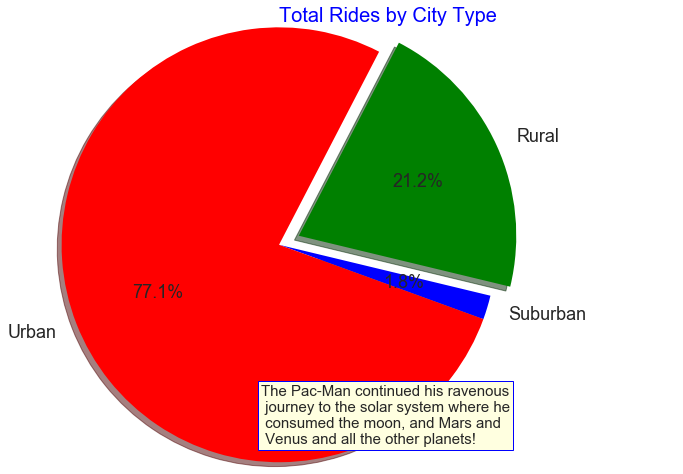

In [188]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
# Calculate Type Percents
# Tells matplotlib to seperate the "Python" section from the others
explode = (0,.1, 0        )
dfctp = pd.pivot_table(df_out,index=['type'],values=['Drivers','Sales','Total Sales'],aggfunc=({'Sales':np.sum,'Total Sales':np.sum,'Drivers':np.sum}))
dfctp.columns =["".join(x) for x in dfctp.columns.ravel()] #renames intelligently
print(dfctp) 
                                                                                               
# Build Pie Chart
labels=["Suburban","Rural","Urban"]
colors=["b","g","r"] 
AX=plt.pie(dfctp['Sales'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-20)
plt.tightlayout=True

plt.text(.15,0, "The Pac-Man continued his ravenous\n journey to the solar system where he\n consumed the moon, and Mars and\n Venus and all the other planets! ",
rotation=0, size=15, weight='normal',
bbox=dict(edgecolor='blue', facecolor='lightyellow', pad=3, linewidth=1),
ha='left', va='top', transform=ax.transAxes)        
 
# ## Creates the pie chart based upon the values above
# # Automatically finds the percentages of each part of the pie chart
# #
 

plt.title('Total Rides by City Type',size=20,color='blue')

# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")
plt.axis([0,1,0,1])
# #dir(plt)
plt.savefig("TotalRidessbyCity")
# Save Figure

In [189]:
# Show Figure
plt.show()

## Total Drivers by City Type

          Drivers    Sales  Total Sales
type                                   
Rural         537    975.0     33509.22
Suburban     8570  11505.0    358386.35
Urban       59602  41911.0   1030453.48


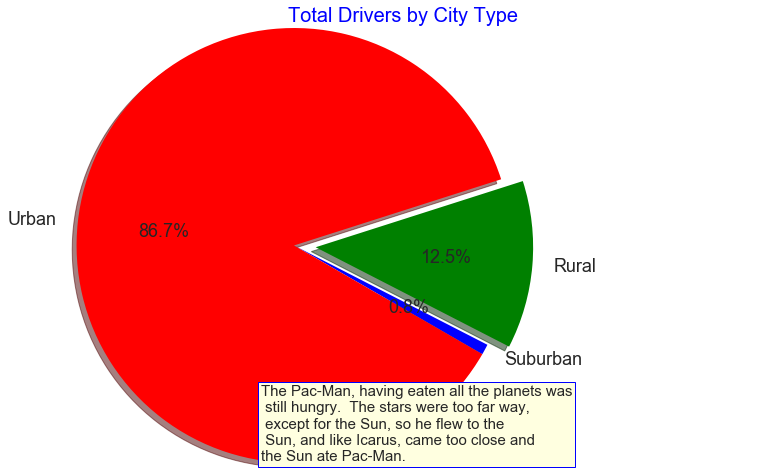

In [190]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
#Calculate Type Percents
# Tells matplotlib to seperate the "Python" section from the others
explode = (0,.1, 0        )
dfctp = pd.pivot_table(df_out,index=['type'],values=['Drivers','Sales','Total Sales'],aggfunc=({'Sales':np.sum,'Total Sales':np.sum,'Drivers':np.sum}))
dfctp.columns =["".join(x) for x in dfctp.columns.ravel()] #renames intelligently
print(dfctp) 
                                                                                               
# Build Pie Chart
labels=["Suburban","Rural","Urban"]
colors=["b","g","r"] 
AX=plt.pie(dfctp['Drivers'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-30)
plt.tightlayout=True

plt.text(.15,0, "The Pac-Man, having eaten all the planets was\n still hungry.  The stars were too far way,\n except for the Sun, so he flew to the\n Sun, and like Icarus, came too close and \nthe Sun ate Pac-Man.",
rotation=0, size=15, weight='normal',
bbox=dict(edgecolor='blue', facecolor='lightyellow', pad=3, linewidth=1),
ha='left', va='top', transform=ax.transAxes)        
 
# ## Creates the pie chart based upon the values above
# # Automatically finds the percentages of each part of the pie chart
# #
 

plt.title('Total Drivers by City Type',size=20,color='blue')

# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")
plt.axis([0,1,0,1])
# #dir(plt)
plt.savefig("TotalDriverssbyCity")
# Save Figure

In [191]:
# Show Figure
plt.show()